In [1]:
#importing required packages
import numpy as np
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd 


In [15]:
#Reading CSV file(input) 
data = pd.read_csv("203 - Sheet1 (1).csv", delimiter = ',')
df = pd.DataFrame(data)

#Listing out unique branches
branch = df['Branch'].unique()
n = len(branch)
print(f"Branch:{branch} Distinct:{n}")

#Listing out unique years
year = df['Year'].unique()
s = len(year)
print(f"\nYear:{year} Distinct:{s}")

#here 6 is the maximum no. of courses for each student

courses={}
i=0

#Inserting courses as keys and assigning values to these courses in the dictionary (named 'courses')
for s1,s2,s3,s4,s5,s6,c in zip(df['Course1'],df['Course2'],df['Course3'],df['Course4'],df['Course5'],df['Course6'],df['Branch']):
    if s1 not in courses and s1 == s1:
        courses.update({s1:i})
        i=i+1
    if s2 not in courses and s2 == s2:
        courses.update({s2:i})
        i=i+1
    if s3 not in courses and s3 == s3:
        courses.update({s3:i})
        i=i+1
    if s4 not in courses and s4 == s4:
        courses.update({s4:i})
        i=i+1
    if s5 not in courses and s5 == s5:
        courses.update({s5:i})
        i=i+1
    if s6 not in courses and s6 == s6:
        courses.update({s6:i})
        i=i+1

print("\nTotal Number of courses is:",len(courses))

print(courses)
print(i)



Branch:['IT' 'CS' 'EEE'] Distinct:3

Year:[1 2] Distinct:2

Total Number of courses is: 18
{'MA110': 0, 'CS110': 1, 'PH110': 2, 'SM725': 3, 'SM500': 4, 'IT205': 5, 'IT203': 6, 'IT201': 7, 'IT200': 8, 'DM100': 9, 'CS208': 10, 'CS215': 11, 'CS200': 12, 'CS202': 13, 'EE201': 14, 'EE205': 15, 'EE207': 16, 'EE200': 17}
18


In [16]:
matrix = [[0 for i in range(len(courses))] for j in range(s*n)]
i=0
temp1=branch[0]

#initializing matrix  
for s1,s2,s3,s4,s5,s6,year,course in zip(df['Course1'],df['Course2'],df['Course3'],df['Course4'],df['Course5'],df['Course6'],df['Year'],df['Branch']):
    if temp1==course:
        year=year+i*s
    else:
        i=i+1
        temp1=branch[i]
        year=year+i*s
    if s1 == s1:
        matrix[year-1][courses[s1]]=1
    if s2 == s2:
        matrix[year-1][courses[s2]]=1 
    if s3 == s3:
        matrix[year-1][courses[s3]]=1
    if s4 == s4:
        matrix[year-1][courses[s4]]=1
    if s5 == s5:
        matrix[year-1][courses[s5]]=1
    if s6 == s6:
        matrix[year-1][courses[s6]]=1

        
Student_mat=pd.DataFrame(matrix, columns=courses.keys())
#Years are assigned indexes like 1 is assigned 0 , 2 is assigned 1 ,1st year in next brach is assigned 3, and so on
print("\n\nList of Courses year wise:") 
Student_mat




List of Subject semester wise:


,MA110,CS110,PH110,SM725,SM500,IT205,IT203,IT201,IT200,DM100,CS208,CS215,CS200,CS202,EE201,EE205,EE207,EE200
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0
4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1


In [17]:
#Reversing the dictionary('courses')
reverse = dict(zip(courses.values(),courses.keys()))
print(reverse)

{0: 'MA110', 1: 'CS110', 2: 'PH110', 3: 'SM725', 4: 'SM500', 5: 'IT205', 6: 'IT203', 7: 'IT201', 8: 'IT200', 9: 'DM100', 10: 'CS208', 11: 'CS215', 12: 'CS200', 13: 'CS202', 14: 'EE201', 15: 'EE205', 16: 'EE207', 17: 'EE200'}


In [20]:
max_slots=0
for i in range(0,n*s):
    count=0
    for j in range(len(courses)):
        if matrix[i][j]==1:
            count+=1
    if(count>max_slots):
        max_slots=count
        
print(max_slots)

8


# course 1

Complete Graph for Courses of Year  1 :
['MA110', 'CS110', 'PH110', 'SM725']


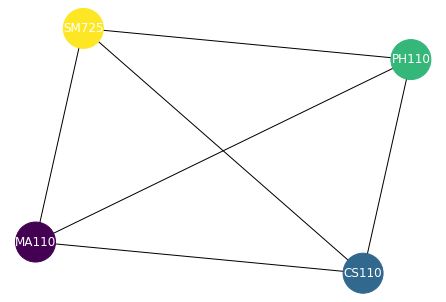

Complete Graph for Courses of Year  2 :
['MA110', 'PH110', 'SM500', 'IT205', 'IT203', 'IT201', 'IT200']


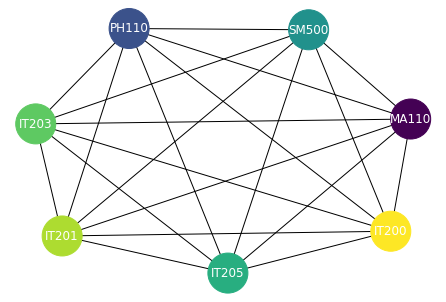

Complete Graph for Courses of Year  3 :
['MA110', 'CS110', 'PH110', 'SM725', 'DM100']


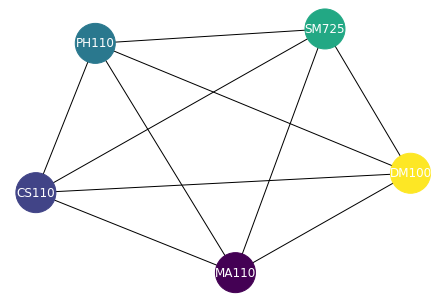

Complete Graph for Courses of Year  4 :
['CS110', 'SM500', 'DM100', 'CS208', 'CS215', 'CS200', 'CS202', 'EE201']


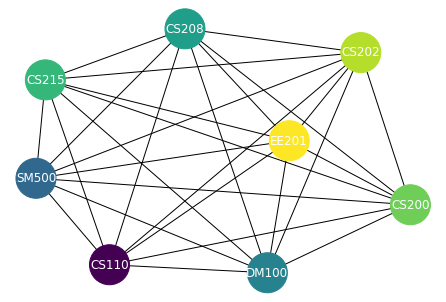

Complete Graph for Courses of Year  5 :
['MA110', 'CS110', 'PH110', 'SM725']


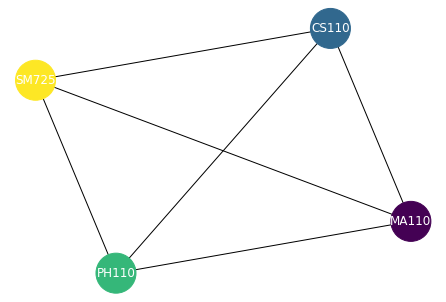

Complete Graph for Courses of Year  6 :
['CS110', 'PH110', 'SM500', 'EE201', 'EE205', 'EE207', 'EE200']


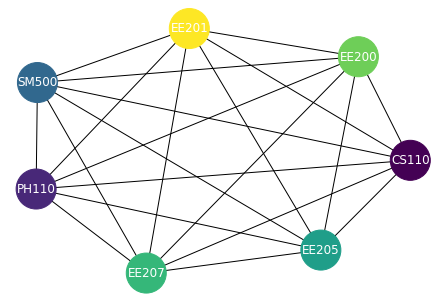

In [19]:
max_slots=2*max_slots
color_courses={}
datesheet=[]
chromatic=[]
chromatic_temp=[]
CompleteGraph = nx.Graph()
x=1

for j in range(0,max_slots):
    chromatic_temp.append(j)
    
for i in range(0,n*s):
    sub=[]
    G = nx.Graph()
    for j in range(0,len(courses)):
        if matrix[i][j]==1:
            sub.append(reverse[j]) #year wise course list
    datesheet.append(sub)
    
    #sub contains courses in each year
    #Initializing chromatic list
    chromatic=chromatic_temp
    
    #removing numbers from chromatic list for the courses which are matching with the previous years
    for y in range(0,i):
        for z in range(0,len(courses)):
            if matrix[y][z] == 1 and reverse[z] in sub and color_courses.get(reverse[z]) in chromatic:
                chromatic.remove(color_courses[reverse[z]])
                
    #Removing numbers from chromatic list for the courses appearing in years after the current year and matches with courses in previous years
    for y in range(i+1,s*n):
        for z in range(0,len(courses)):
            if matrix[y][z] == 1 and reverse[z] in color_courses.keys() and color_courses.get(reverse[z]) in chromatic:
                chromatic.remove(color_courses[reverse[z]])
                
    #Updating 'color_courses' dictionary
    index=0
    for subject in range(0,len(sub)):
        if sub[subject] not in color_courses.keys():
            color_courses.update({sub[subject]:chromatic[index]})
            index=index+1
    
    print("Complete Graph for Courses of Year ",i+1,":")
    print(sub)
    x+=1
    G.add_nodes_from(sub)
    
    G.add_edges_from(itertools.combinations(sub, 2))
    values = [color_courses.get(node,0.25) for node in sub]
    CompleteGraph.add_nodes_from(sub)
    CompleteGraph.add_edges_from(itertools.combinations(sub, 2), weight =8)
    #plotting the graph for each year
    nx.draw(G, node_size=1600,cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')

    plt.show()

Graph for All Courses


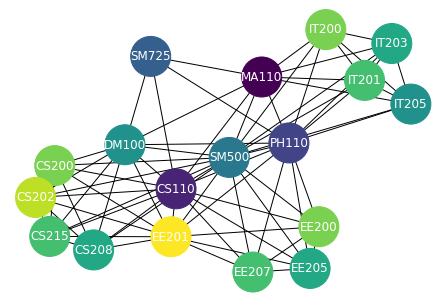

In [21]:

print("Graph for All Courses")
values = [color_courses.get(node,0.25) for node in CompleteGraph.nodes()]
nx.draw(CompleteGraph, node_size=1600, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
nx.draw
plt.show()


In [22]:
print("Colors alloted to Each Course")
for i,j in zip(color_courses.keys(),color_courses.values()):
    print(i,"-",j)

Colors alloted to Each Course
MA110 - 0
CS110 - 1
PH110 - 2
SM725 - 3
SM500 - 4
IT205 - 5
IT203 - 6
IT201 - 7
IT200 - 8
DM100 - 5
CS208 - 6
CS215 - 7
CS200 - 8
CS202 - 9
EE201 - 10
EE205 - 6
EE207 - 7
EE200 - 8


In [23]:
#Updating to total number of slots(days)
max_slots=-1
for i,j in zip(color_courses.keys(),color_courses.values()):
    if(j>max_slots):
        max_slots=j
max_slots=max_slots+1
print(max_slots)

11


In [25]:
temp=max_slots+2
#Declaring 2-D array of size ( n*s ,temp )
data=[['']*temp for i in range(n*s)]
column=['Branch','Year']

#Initializing the array
for i in range(0,n*s):
    for j in range(0,len(courses)):
        if matrix[i][j] is 1:
            data[i][2+color_courses[reverse[j]]]=str(reverse[j])
            
#Appending strings naming days in array 'column'
for i in range(1,max_slots+1):
    day='Day'+str(i)
    column.append(day)

final = pd.DataFrame(data, columns=column)
j=1
for i in range(0,n*s):
    if i < j*s:
        final.at[i,'Branch']=(df['Branch'].unique()[j-1])
    else:
        j=j+1
        final.at[i,'Branch']=(df['Branch'].unique()[j-1])
    
    final.at[i,'Year']=(df['Year'].unique()[(i)%s])

print("\nFinal Schedule for each year:")
final


Final Schedule for each year:


,Branch,Year,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,Day11
0,IT,1,MA110,CS110,PH110,SM725,,,,,,,
1,IT,2,MA110,,PH110,,SM500,IT205,IT203,IT201,IT200,,
2,CS,1,MA110,CS110,PH110,SM725,,DM100,,,,,
3,CS,2,,CS110,,,SM500,DM100,CS208,CS215,CS200,CS202,EE201
4,EEE,1,MA110,CS110,PH110,SM725,,,,,,,
5,EEE,2,,CS110,PH110,,SM500,,EE205,EE207,EE200,,EE201
